In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation

In [2]:
customer_df_original = pd.read_csv('../data/customer_churn_dataset.csv')
customer_df = customer_df_original.copy()
customer_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [3]:
customer_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [4]:
customer_df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [5]:
customer_df.duplicated().unique()

array([False])

In [6]:
# Reomoving customer id because it is a descriptive column and dosen't messure anything
customer_df = customer_df.drop('CustomerID',axis=1)
customer_df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [7]:
customer_df_unique  = customer_df.copy()
for col in customer_df_unique.columns:
    customer_df_unique[col] = pd.Series(customer_df_unique[col].unique())
customer_df_unique

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,41.0,Male,28.0,28.0,7.0,13.0,Standard,Annual,584.0,20.0,0.0
2,47.0,NaN,27.0,10.0,2.0,29.0,Premium,Quarterly,757.0,21.0,NaN
3,35.0,NaN,9.0,12.0,5.0,17.0,NaN,NaN,232.0,18.0,NaN
4,53.0,NaN,58.0,24.0,9.0,2.0,NaN,NaN,533.0,29.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
64369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def get_columns(df):
    unique_values_by_col = {}
    for col in df.columns:
        if df[col].dtype == "object" and col != "Churn":
            col_values = df[col].unique()
            unique_values_by_col[col] = col_values

    new_columns = []
    old_columns = []
    for col in unique_values_by_col:
        old_columns.append(col)
        for value in unique_values_by_col[col]:
            new_column = col + " " + value
            new_columns.append(new_column)
    return unique_values_by_col
unique_values_by_col = get_columns(customer_df.copy())

In [9]:
def one_hot_encoder(df,unique_values_by_col):
  
    new_columns = []
    old_columns = []
    for col in unique_values_by_col:
        old_columns.append(col)
        for value in unique_values_by_col[col]:
            new_column = col + " " + value
            new_columns.append(new_column)
    
    new_column_counter = 0         
    for col in old_columns:
        for unique_value in unique_values_by_col[col]:
            counter = 0
            encoded_values = []

            for val in df[col]: 
                if val == unique_value:
                    encoded_values.append(1)
                else:
                    encoded_values.append(0)
            counter += 1
            encoded_values = pd.Series(encoded_values)
            df[new_columns[new_column_counter]] = encoded_values  
            new_column_counter +=1   

    df = df.drop(old_columns, axis=1)    
    return df
customer_df = one_hot_encoder(customer_df.copy(),unique_values_by_col)
encoder = one_hot_encoder

In [10]:
customer_df = customer_df.drop('Gender Male',axis=1)
customer_df

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender Female,Subscription Type Basic,Subscription Type Standard,Subscription Type Premium,Contract Length Monthly,Contract Length Annual,Contract Length Quarterly
0,22,25,14,4,27,598,9,1,1,1,0,0,1,0,0
1,41,28,28,7,13,584,20,0,1,0,1,0,1,0,0
2,47,27,10,2,29,757,21,0,0,0,0,1,0,1,0
3,35,9,12,5,17,232,18,0,0,0,0,1,0,0,1
4,53,58,24,9,2,533,18,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45,33,12,6,21,947,14,1,1,1,0,0,0,0,1
64370,37,6,1,5,22,923,9,1,0,0,1,0,0,1,0
64371,25,39,14,8,30,327,20,1,0,0,0,1,1,0,0
64372,50,18,19,7,22,540,13,1,1,0,1,0,1,0,0


# Data exploration

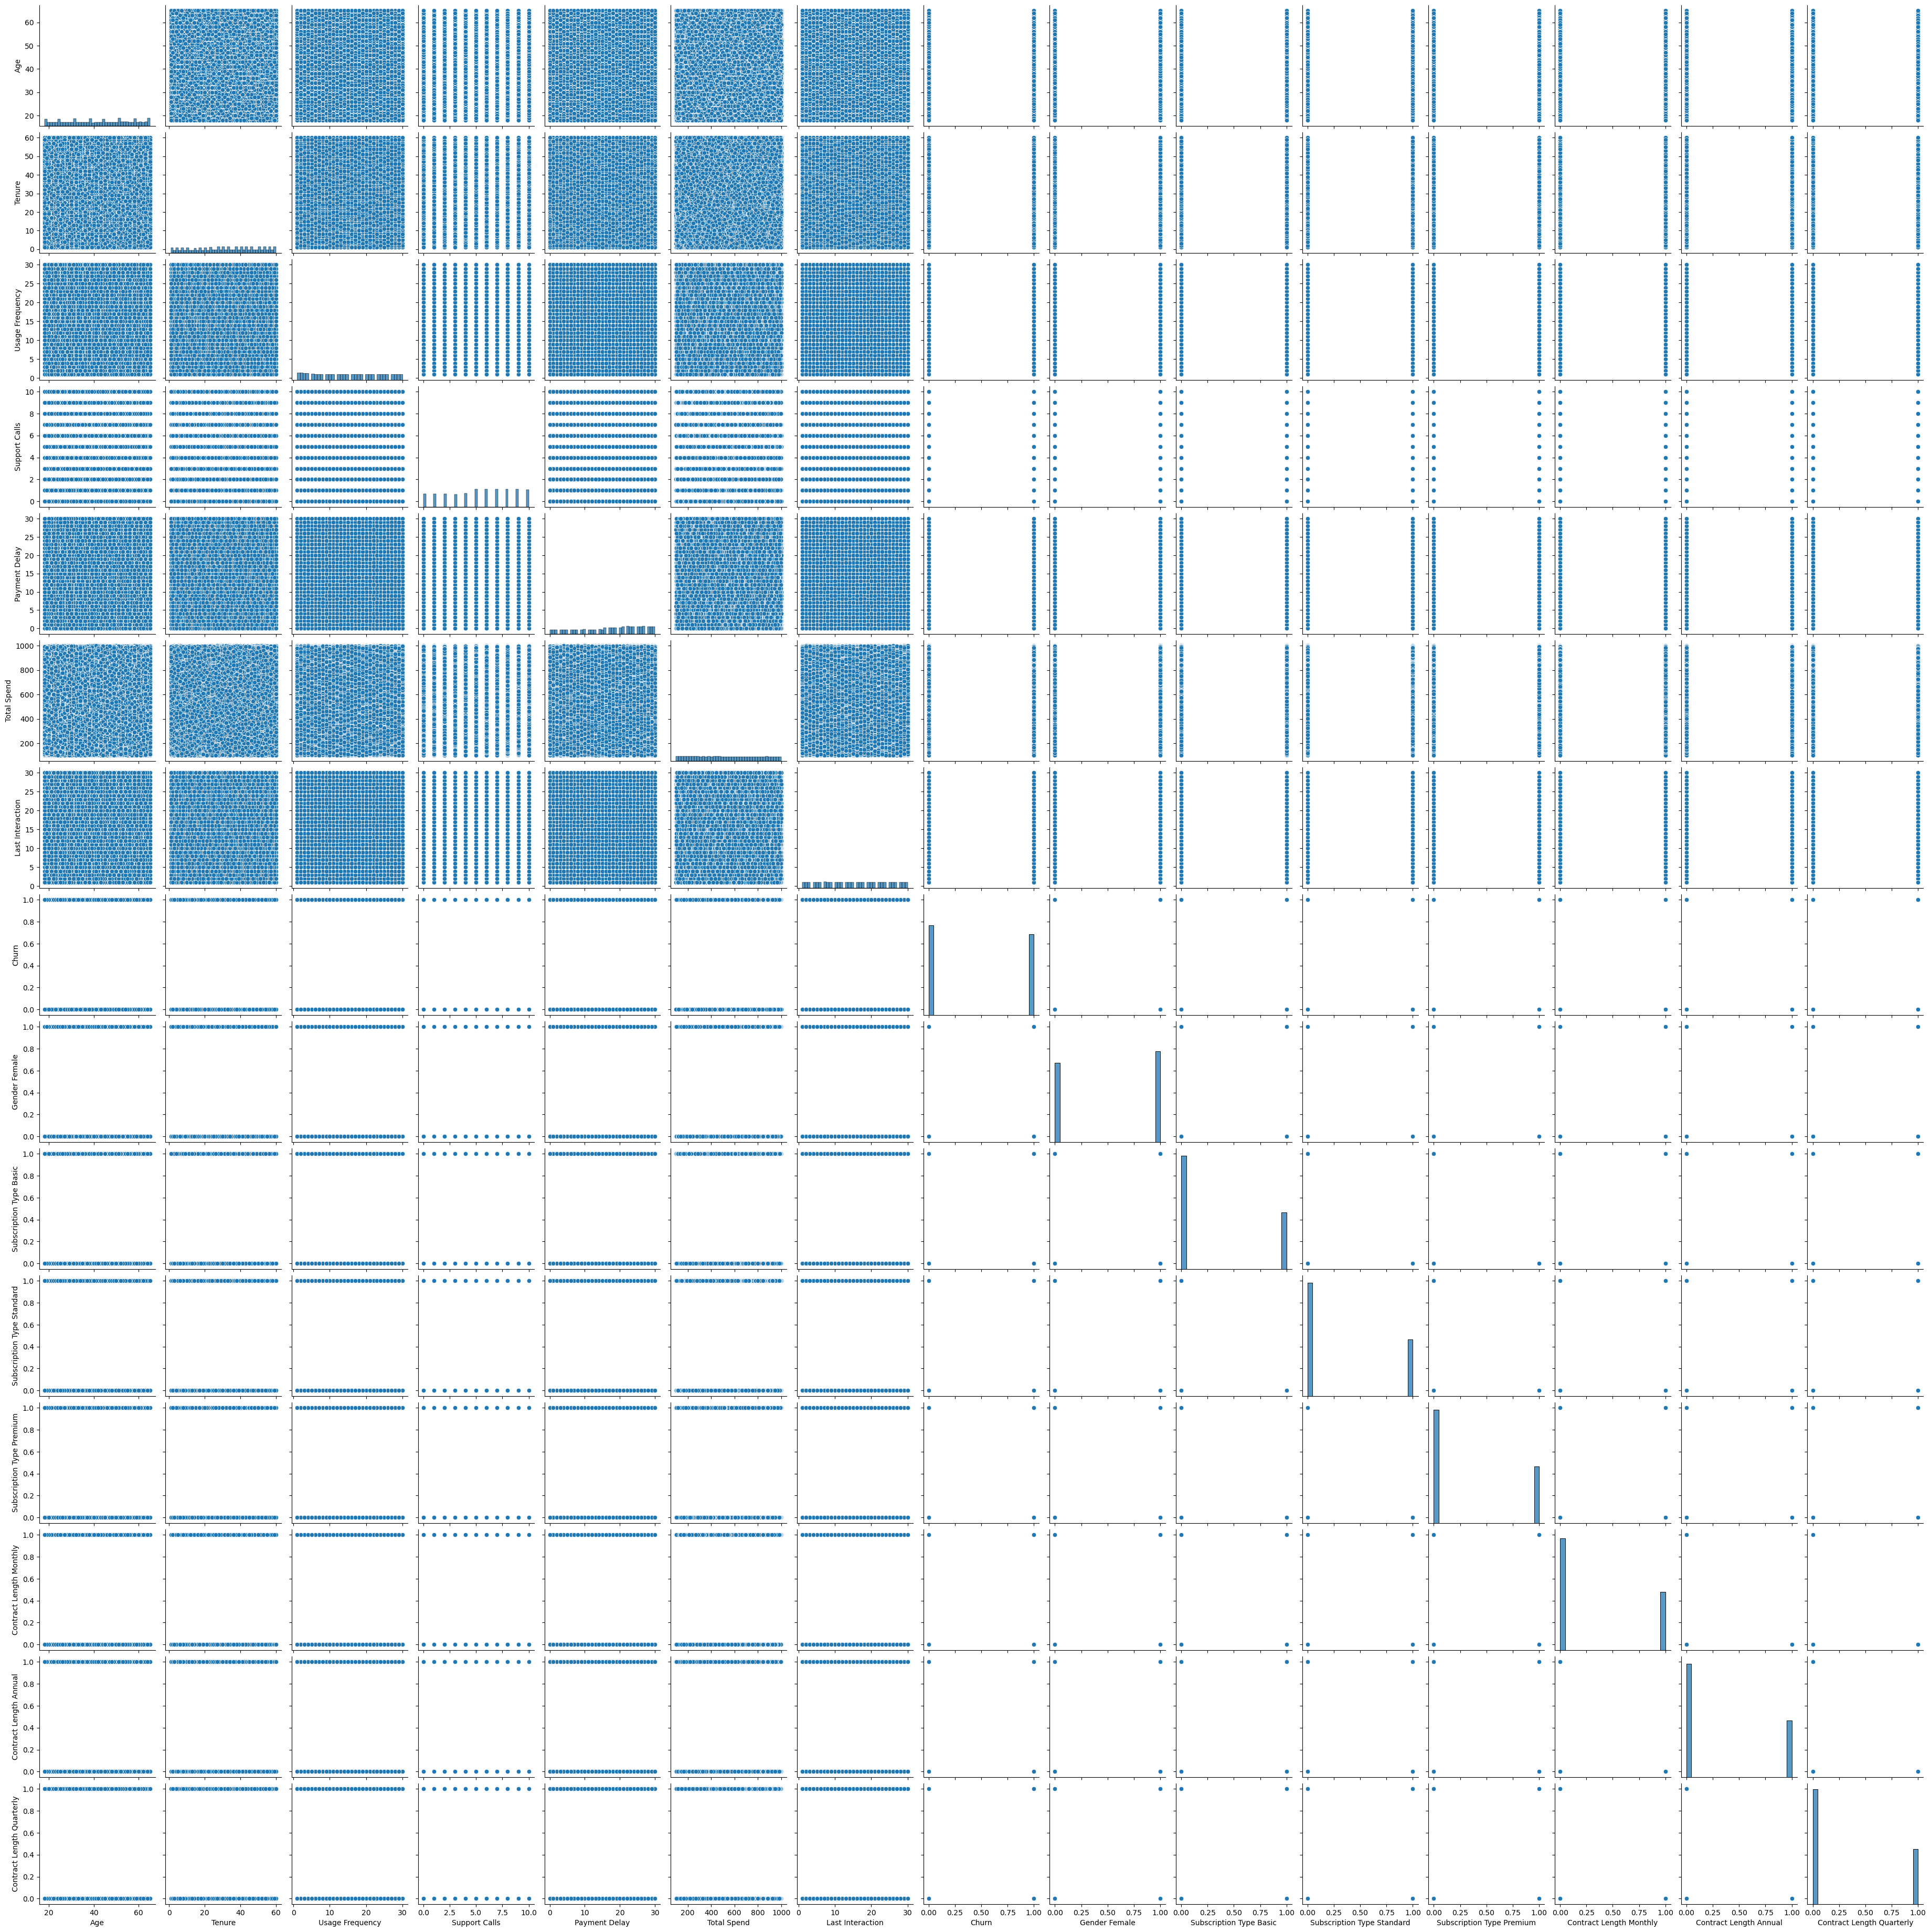

In [11]:
sns.pairplot(data=customer_df)
plt.show()

In [12]:
# None of the features show any correlation between them, it makes sense because they don't have anything to do with each other

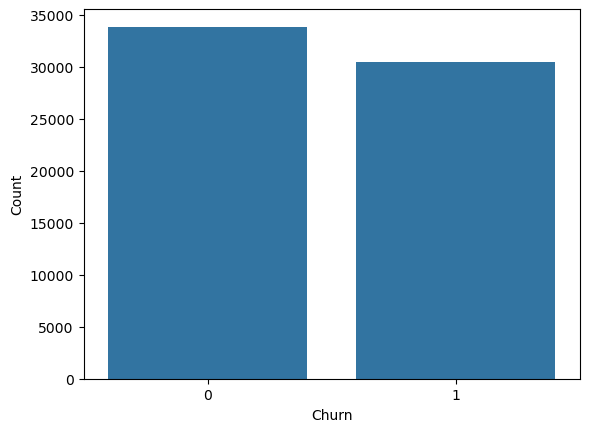

In [13]:
sns.countplot(data=customer_df,x='Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Classification model training

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score

In [15]:
def get_train_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    return (X_train, X_test, y_train, y_test)

In [16]:
def get_scaled_data(X_train,X_test):
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    return (scaled_X_train, scaled_X_test)

In [17]:
def get_metrics(y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    metrics = [accuracy,recall,f1] 
    return metrics

In [18]:
def show_confusion_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    cmap = plt.cm.viridis
    
    sns.heatmap(cm, annot=True, fmt="d", cmap = cmap)
    
    plt.title('Confusion matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [19]:
X = customer_df.drop('Churn',axis=1)
y = customer_df['Churn']

In [20]:
# Logistic Regression

In [21]:
X_train, X_test, y_train, y_test = get_train_test(X,y)
scaled_X_train, scaled_X_test = get_scaled_data(X_train,X_test)

In [22]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
Cs = [0.1,1,10,100]
# using parameters for lambdas in a logarithmic scale
logistic_model = LogisticRegressionCV(cv=5,max_iter=100,multi_class='multinomial',solver='saga',penalty='l1',Cs=Cs)
logistic_model.fit(scaled_X_train,y_train)

LogisticRegressionCV(Cs=[0.1, 1, 10, 100], cv=5, multi_class='multinomial',
                     penalty='l1', solver='saga')

In [23]:
logistic_model.C_

array([0.1])

In [24]:
logistic_model = LogisticRegression(max_iter=100,multi_class='ovr',solver='saga',penalty='l1',C=1)
logistic_model.fit(scaled_X_train,y_train)
y_pred = logistic_model.predict(scaled_X_test)

In [25]:
y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [26]:
log_prob = logistic_model.predict_proba(scaled_X_test)
log_prob

array([[0.98655831, 0.01344169],
       [0.99632863, 0.00367137],
       [0.13977348, 0.86022652],
       ...,
       [0.77235296, 0.22764704],
       [0.10345814, 0.89654186],
       [0.07323428, 0.92676572]])

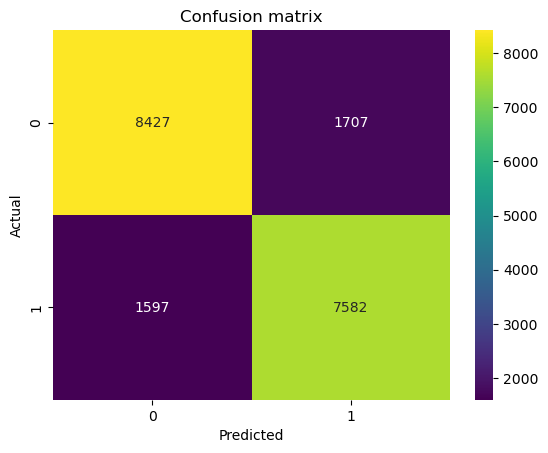

In [27]:
show_confusion_matrix(y_test,y_pred)

In [28]:
logistic_metrics = get_metrics(y_test,y_pred)

In [29]:
# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = get_train_test(X,y)
scaled_X_train, scaled_X_test = get_scaled_data(X_train,X_test)

In [31]:
scores = []

for k in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    y_pred = knn_model.predict(scaled_X_test)
    accuracy = accuracy_score(y_test,y_pred)
    scores.append(accuracy)

In [32]:
scores

[0.8807538963392534,
 0.8720033138300627,
 0.8979961683839901,
 0.9012582198519132,
 0.9069538652720965,
 0.9111479314451406,
 0.9104230311189354,
 0.9148242116708952,
 0.9110961528504117]

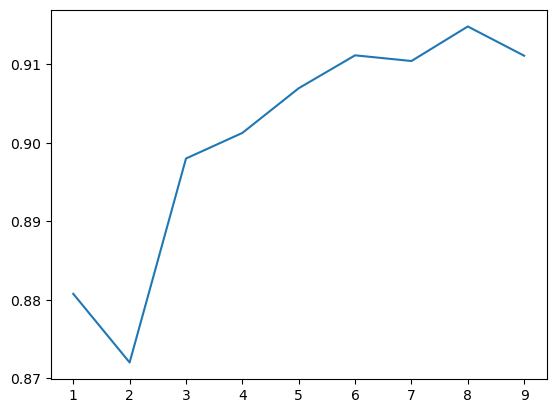

In [33]:
x_axis = np.linspace(1,9,9)
plt.plot(x_axis,scores)
plt.show()

In [34]:
# I used only 10 optinal  k's as a start since the dataset is large and time cumsuming and chose k=3 as the optimal k becuase I think adding 3 k's for 1 percent accruacy is not worth it
optimal_k = 3
optimal_k

3

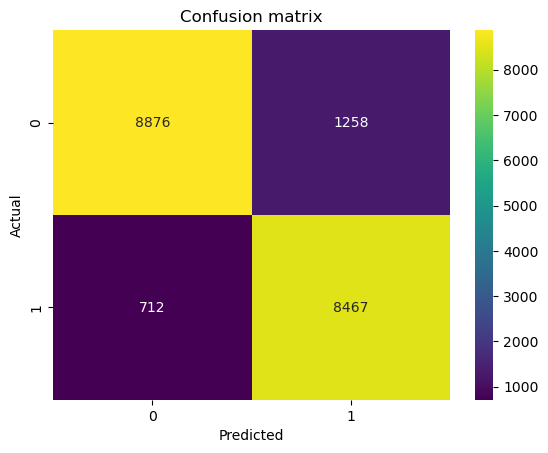

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(scaled_X_train,y_train)
y_pred = knn_model.predict(scaled_X_test)
show_confusion_matrix(y_test,y_pred)
knn_metrics = get_metrics(y_test,y_pred)

In [36]:
knn_prob = knn_model.predict_proba(scaled_X_test)
knn_prob

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       ...,
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667]])

In [37]:
# SVM

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = get_train_test(X,y)
scaled_X_train, scaled_X_test = get_scaled_data(X_train,X_test)

In [39]:
# I chose all the kernels I know and logarithmic scale gamma values, I also limited the degrees for the poly kernel

In [40]:
svc_model = SVC()
params = {'kernel': ['linear','rbf','poly'], 'C':[0.1,1,10],'degree':[2,3,4]}
gridCV = GridSearchCV(svc_model,params,scoring='accuracy',n_jobs=-1)
gridCV.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

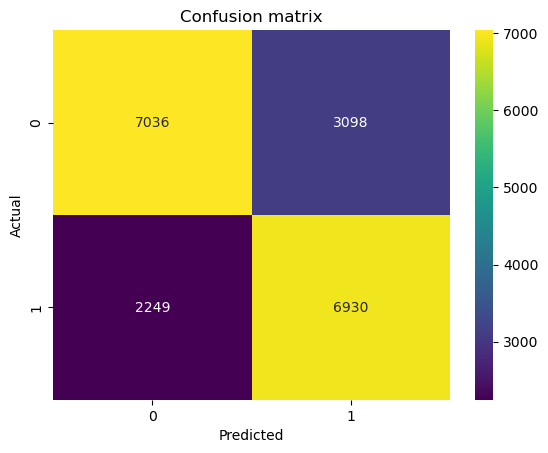

In [41]:
svc_model = SVC(kernel='poly',degree=2,C=10,probability=True)
svc_model.fit(scaled_X_train,y_train)
y_pred = svc_model.predict(scaled_X_test)
show_confusion_matrix(y_test,y_pred)
svm_metrics = get_metrics(y_test,y_pred)

In [42]:
svm_prob = svc_model.predict_proba(scaled_X_test)
svm_prob

array([[0.52279328, 0.47720672],
       [0.56464893, 0.43535107],
       [0.46372905, 0.53627095],
       ...,
       [0.88993961, 0.11006039],
       [0.5       , 0.5       ],
       [0.49233818, 0.50766182]])

In [43]:
# Random forest

In [44]:
# I chose a range of estimators from low to high, max fetures and max depth starting for the square root of the number of features
# Min samples split from 20 - 100 since there are 50000 rows and I don't wnat to many leaf nodes to prevent overfitting
# Max nodes accordingly to the number of 50000 rows

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
forest_model = RandomForestClassifier()
n_estimators = [25,64,128,256]
max_features = [4,6,8,10]
max_depth = [4,6,8,10]
min_samples_split = [20,50,100]
bootstrap = [True,False]
oob_score = [True,False]
max_nodes = [2000,5000,10000]
params = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
'min_samples_split':min_samples_split,'bootstrap':bootstrap,'oob_score':oob_score}
gridCV = GridSearchCV(forest_model,params,scoring='accuracy',n_jobs=2)
gridCV.fit(scaled_X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
960 fits failed out of a total of 3840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    raise ValueEr

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'bootstrap': [True, False], 'max_depth': [4, 6, 8, 10],
                         'max_features': [4, 6, 8, 10],
                         'min_samples_split': [20, 50, 100],
                         'n_estimators': [25, 64, 128, 256],
                         'oob_score': [True, False]},
             scoring='accuracy')

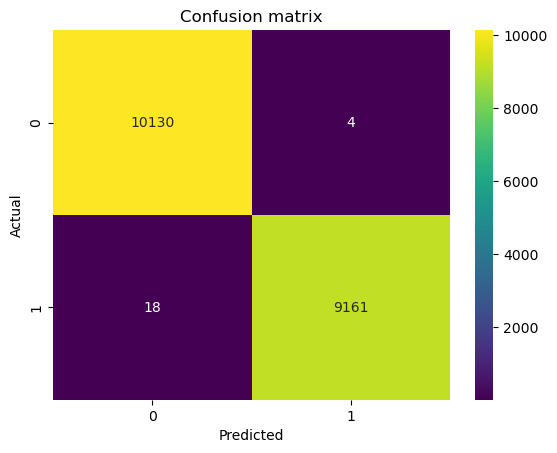

In [47]:
forest_model = RandomForestClassifier(n_estimators=128,max_features=6,max_depth=10,min_samples_split=20)
forest_model.fit(scaled_X_train,y_train)
y_pred = forest_model.predict(scaled_X_test)
show_confusion_matrix(y_test,y_pred)
forest_metrics = get_metrics(y_test,y_pred)

In [48]:
forest_prob = forest_model.predict_proba(scaled_X_test)
forest_prob

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.00421383, 0.99578617],
       ...,
       [0.99269903, 0.00730097],
       [0.        , 1.        ],
       [0.0058613 , 0.9941387 ]])

# Metrics and export

In [49]:
data = [[logistic_metrics[0],logistic_metrics[1],logistic_metrics[2]],
        [knn_metrics[0],knn_metrics[1],knn_metrics[2]],
        [svm_metrics[0],svm_metrics[1],svm_metrics[2]],
        [forest_metrics[0],forest_metrics[1],forest_metrics[2]]]
metrics = pd.DataFrame(data=data,index=['Logistic_Regression','KNN','SVM','Random_forest'],columns=['Accuracy score','Recall score','F1 score'])
metrics.round(2)

,Accuracy score,Recall score,F1 score
Logistic_Regression,0.83,0.83,0.82
KNN,0.90,0.92,0.90
SVM,0.72,0.75,0.72
Random_forest,1.00,1.00,1.00


In [50]:
final_model = RandomForestClassifier(n_estimators=128,max_features=6,max_depth=20,min_samples_split=20)
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
final_model.fit(scaled_X,y)
pred = final_model.predict(scaled_X)
print(pred[0:50])

[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0]


In [52]:
from joblib import dump,load
dump(scaler,'../models/customer_churn_scaler.joblib')
dump(encoder,'../models/customer_churn_encoder.joblib')
dump(final_model,'../models/customer_churn_model.joblib')

['../models/customer_churn_model.joblib']

In [53]:
loaded_scaler = load('../models/customer_churn_scaler.joblib')
loaded_encoder = load('../models/customer_churn_encoder.joblib')
loaded_model = load('../models/customer_churn_model.joblib')

In [54]:
test_data = customer_df_original[0:50]
test_data = loaded_encoder(test_data,unique_values_by_col)
test_data = test_data.drop(['Gender Male','CustomerID','Churn'],axis=1)
test_data

C:\Users\yaelg\AppData\Local\Temp\ipykernel_2644\1168401866.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_columns[new_column_counter]] = encoded_values
C:\Users\yaelg\AppData\Local\Temp\ipykernel_2644\1168401866.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_columns[new_column_counter]] = encoded_values
C:\Users\yaelg\AppData\Local\Temp\ipykernel_2644\1168401866.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender Female,Subscription Type Basic,Subscription Type Standard,Subscription Type Premium,Contract Length Monthly,Contract Length Annual,Contract Length Quarterly
0,22,25,14,4,27,598,9,1,1,0,0,1,0,0
1,41,28,28,7,13,584,20,1,0,1,0,1,0,0
2,47,27,10,2,29,757,21,0,0,0,1,0,1,0
3,35,9,12,5,17,232,18,0,0,0,1,0,0,1
4,53,58,24,9,2,533,18,1,0,1,0,0,1,0
5,30,41,14,10,10,500,29,0,0,0,1,1,0,0
6,47,37,15,9,28,574,14,1,1,0,0,0,0,1
7,54,36,11,0,18,323,16,1,0,1,0,1,0,0
8,36,20,5,10,8,687,8,0,1,0,0,1,0,0
9,65,8,4,2,23,995,10,0,1,0,0,0,1,0


In [55]:
test_data = loaded_scaler.transform(test_data)
pred = loaded_model.predict(test_data)
pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0], dtype=int64)